In [1]:
# Importing required modules and libraries
import geopandas as gp
import pandas as pd
import os
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Importing data from Socrata database
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [3]:
#importing Pluto data form Manhattan

bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000021C733C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000415EF5F8>]], dtype=object)

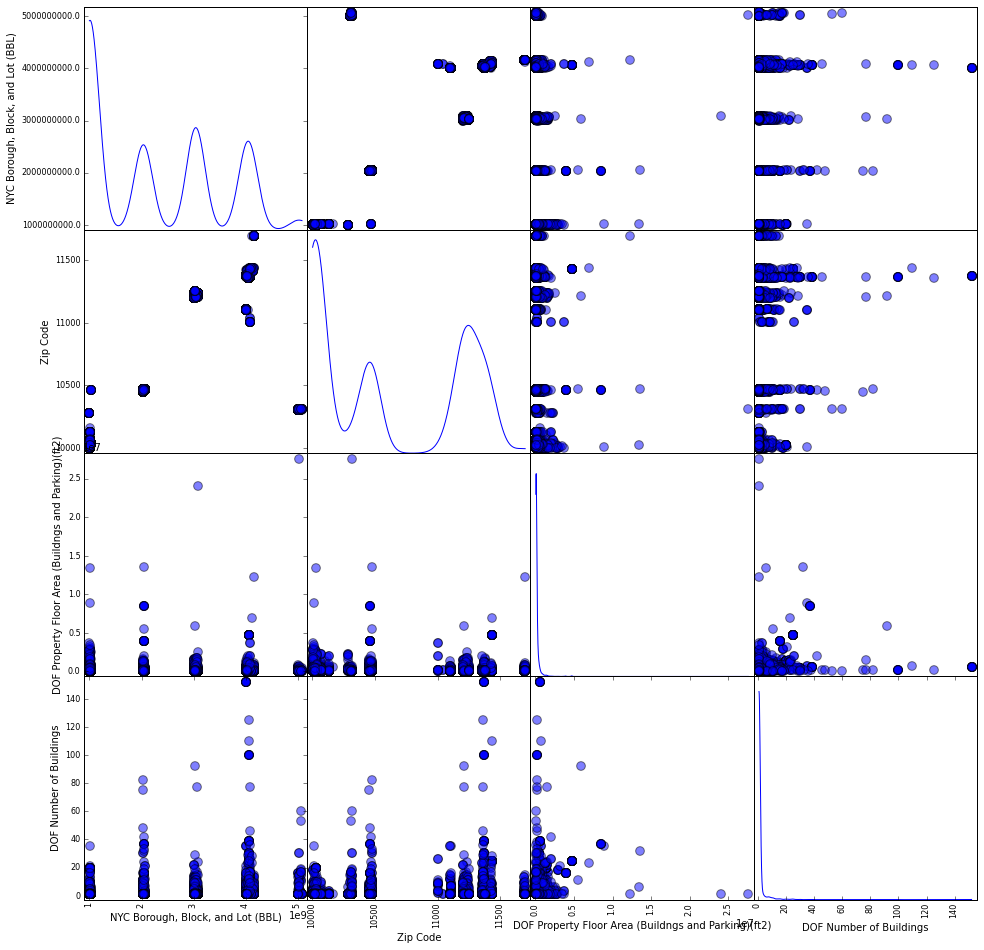

In [4]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [5]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [6]:
#create the indeces arrays needed
vcanconvert = np.vectorize(canconvert)

indx1 = vcanconvert(nrg['Site EUI(kBtu/ft2)'])
indx2 = vcanconvert(nrg['Reported Property Floor Area (Building(s)) (ft²)'])

In [7]:
#Run the index in the desired Dataframe colums to replace empty values with NaN
nrg['Site EUI(kBtu/ft2)'][~indx1]=float('NaN')
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx2]=float('NaN')

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [8]:
# Print Columns to check functionallity
print nrg['Site EUI(kBtu/ft2)'].astype(float)
print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


In [9]:
#Create new Column on energy dataframe with the same BBL reference as pluto data
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']

In [10]:
#Merge both dataframes (Pluto and energy) on the BBL colum
bblnrgdata = pd.merge(nrg, bsize, on=['BBL'])

C:\Users\juanpablo\Anaconda\lib\site-packages\pandas\core\index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
C:\Users\juanpablo\Anaconda\lib\site-packages\pandas\core\index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


In [11]:
#Verifiy the new dataframe created
print bblnrgdata.columns

Index([                  u'NYC Borough, Block, and Lot (BBL)',
                                    u'Co-reported BBL Status',
                                          u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
                                             u'Street Number',
                                               u'Street Name',
                                                 u'Borough_x',
                                                  u'Zip Code',
                        u'DOF Benchmarking Submission Status',
                                        u'Site EUI(kBtu/ft2)', 
       ...
                                                u'YearAlter2',
                                                 u'YearBuilt',
                                                    u'ZMCode',
                                                   u'ZipCode',
                                                 u'ZoneDist1',
                                           

In [12]:
#Create a unit of total Energy use per building as a product of kBTU/ft2 and ft2 size 
tenergy = bblnrgdata['Site EUI(kBtu/ft2)'].astype(float) * \
bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

C:\Users\juanpablo\Anaconda\lib\site-packages\pandas\core\index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


In [13]:
#Create a new column on the dataframe with this total energy data and printing it
bblnrgdata['tenergy'] = tenergy
bblnrgdata['tenergy']

0       1.932388e+07
1       8.923786e+06
2       6.484985e+06
3       7.252000e+06
4       2.657421e+07
5       8.313213e+06
6       2.606125e+10
7       4.507029e+07
8       8.861394e+05
9                NaN
10      6.721880e+06
11      1.571334e+07
12      8.304709e+06
13      7.611074e+07
14      8.857581e+07
15      7.286018e+06
16      5.401410e+06
17      6.619960e+06
18      1.715440e+06
19      4.870652e+06
20               NaN
21      3.643200e+06
22      4.235712e+07
23      8.150267e+06
24      4.539942e+06
25      4.937273e+06
26      4.323671e+07
27               NaN
28      1.368137e+07
29               NaN
            ...     
6515             NaN
6516             NaN
6517             NaN
6518             NaN
6519             NaN
6520             NaN
6521             NaN
6522             NaN
6523             NaN
6524             NaN
6525             NaN
6526             NaN
6527             NaN
6528             NaN
6529             NaN
6530             NaN
6531         

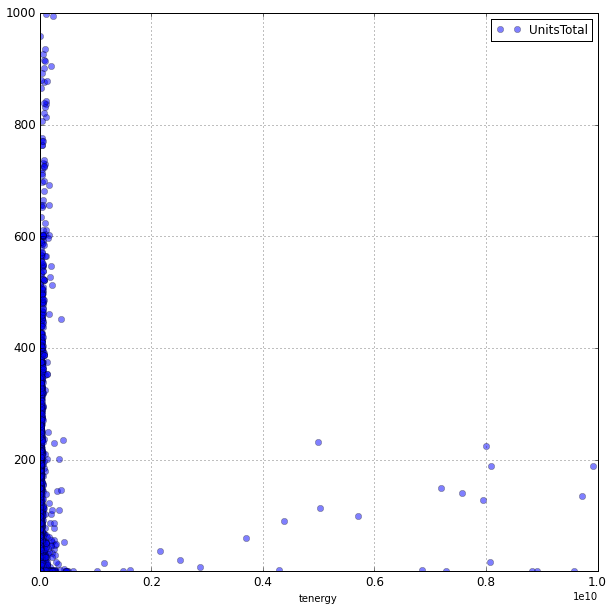

In [14]:
#plot Total energy vs Total units
bblnrgdata.plot(x ='tenergy', y ='UnitsTotal', style='o', xlim=(1000, 1e10), ylim=(1, 1000), grid=True, \
                figsize=(10,10), fontsize = 12, alpha=0.5)

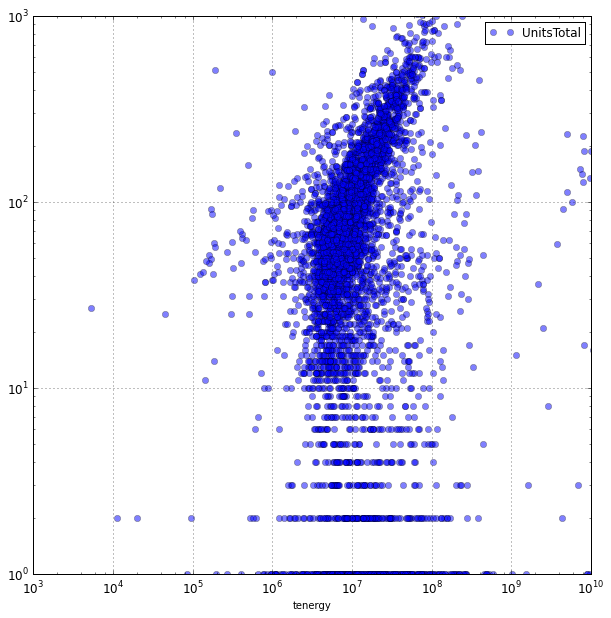

In [15]:
#plot Total energy vs Total units with a log scale
bblnrgdata.plot(x ='tenergy', y ='UnitsTotal', style='o', xlim=(1000, 1e10), ylim=(1, 1000), grid=True, figsize=(10,10), \
                fontsize = 12, logx = True, logy=True, alpha=0.5)

In [16]:
#Cutting the dataset for outliers in the Total energy consumption and  number of units
bblnrgdata_cut = bblnrgdata[bblnrgdata.tenergy > 1000]
bblnrgdata_cut1 = bblnrgdata_cut[bblnrgdata_cut.UnitsTotal < 2000]
bblnrgdata_cut2 = bblnrgdata_cut1[bblnrgdata_cut1.UnitsTotal >1]
#Creating new columns in dataframe with the log values of total energy consumption
# and total number of units
bblnrgdata_cut2['ltenergy'] = np.log10(bblnrgdata_cut2.tenergy)
bblnrgdata_cut2['lUnitsTotal'] = np.log10(bblnrgdata_cut2.UnitsTotal)

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
#perfoming OLS regression of Total energy consumption as a function of the Number of units (log) 
mod = smf.ols(formula='ltenergy ~ lUnitsTotal', data = bblnrgdata_cut2 , missing='drop').fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               ltenergy   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     253.5
Date:                Sun, 25 Oct 2015   Prob (F-statistic):           1.29e-55
Time:                        09:58:40   Log-Likelihood:                -3293.0
No. Observations:                4649   AIC:                             6590.
Df Residuals:                    4647   BIC:                             6603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       6.6603      0.025    265.724      

In [18]:
#printing the parameters of the OLS Regression
a = mod.params
a

Intercept      6.660311
lUnitsTotal    0.214039
dtype: float64

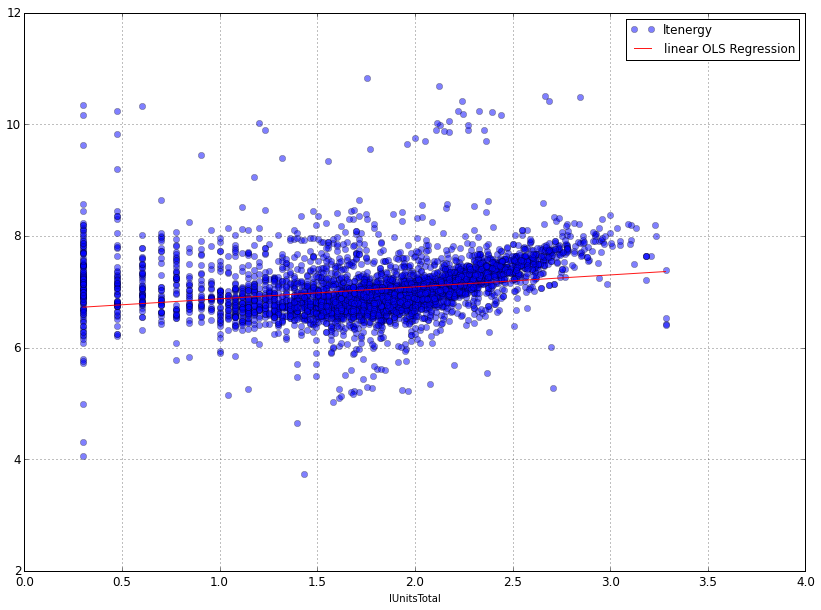

In [19]:
#Simlating 100 estimated Total energy observations with the coeficcients of the regression
lUnitsTotals_prime = np.linspace(bblnrgdata_cut2.lUnitsTotal.min(), bblnrgdata_cut2.lUnitsTotal.max(), 100)
ltenergy_hat = a[0] + a[1]*(lUnitsTotals_prime)
#plot Total energy vs Total units with a log scale, and a simulated linear regression line
bblnrgdata_cut2.plot(x ='lUnitsTotal', y ='ltenergy', style='o', grid=True, figsize=(14,10), \
                fontsize = 12,  xlim=(0, 4), ylim=(2,12), alpha=0.5)
pl.plot(lUnitsTotals_prime, ltenergy_hat, 'r', alpha=0.9, label="linear OLS Regression")
pl.legend()

In [20]:
#perfoming OLS regression of Number of total units as a function of
#Total energy consumption (log) 
mod1 = smf.ols(formula='lUnitsTotal ~ ltenergy', data = bblnrgdata_cut2 , missing='drop').fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:            lUnitsTotal   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     253.5
Date:                Sun, 25 Oct 2015   Prob (F-statistic):           1.29e-55
Time:                        09:58:56   Log-Likelihood:                -3575.3
No. Observations:                4649   AIC:                             7155.
Df Residuals:                    4647   BIC:                             7168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0837      0.107      0.781      0.4

In [21]:
#Printing the regression parameters
b = mod1.params
b

Intercept    0.083671
ltenergy     0.241685
dtype: float64

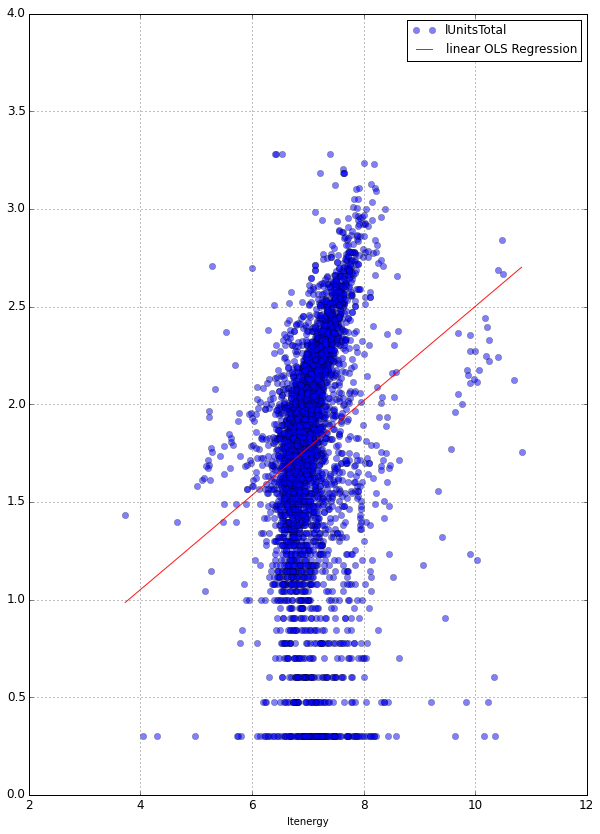

In [22]:
#Simlating 100 estimated observations with the coeficcients of the regression
ltenergy_prime1 = np.linspace(bblnrgdata_cut2.ltenergy.min(), bblnrgdata_cut2.ltenergy.max(), 100)
lUnitsTotal_hat = b[0] + b[1]*(ltenergy_prime1)

#plot Total number of units vs Total energy consumption with a log scale, and a 
# the estimated linear regression line
bblnrgdata_cut2.plot(x ='ltenergy', y ='lUnitsTotal', style='o', grid=True, figsize=(10,14), \
                     fontsize = 12,  xlim=(2, 12), ylim=(0,4), alpha = 0.5)
plt.plot(ltenergy_prime1, lUnitsTotal_hat, 'r', alpha=0.9, label = "linear OLS Regression")
pl.legend()

From both regression and plots, we can see that the better fit is for this case is to set number of units as the explanatory variable and Total energy consumption as the dependent variable; it's seems logical to demostrate that an increase in the num ber of units is in direct relation to the total energy consumption of a building (for every 21% increase in the number of units there is a 1% increase in the total energy consumption according to the regression estimated).

In [23]:
#perfoming OLS regression of Total energy consumption as a function of the Number of units (log)
# with a polinomial formula
mod3 = smf.ols(formula='ltenergy ~ 1 + lUnitsTotal +  I(lUnitsTotal ** 2.0)', data = bblnrgdata_cut2 , missing='drop').fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:               ltenergy   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     527.6
Date:                Sun, 25 Oct 2015   Prob (F-statistic):          3.35e-207
Time:                        09:59:11   Log-Likelihood:                -2940.7
No. Observations:                4649   AIC:                             5887.
Df Residuals:                    4646   BIC:                             5907.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 7.62

In [24]:
#Printing the regression parameters
c = mod3.params
c

Intercept                7.619952
lUnitsTotal             -1.145732
I(lUnitsTotal ** 2.0)    0.422444
dtype: float64

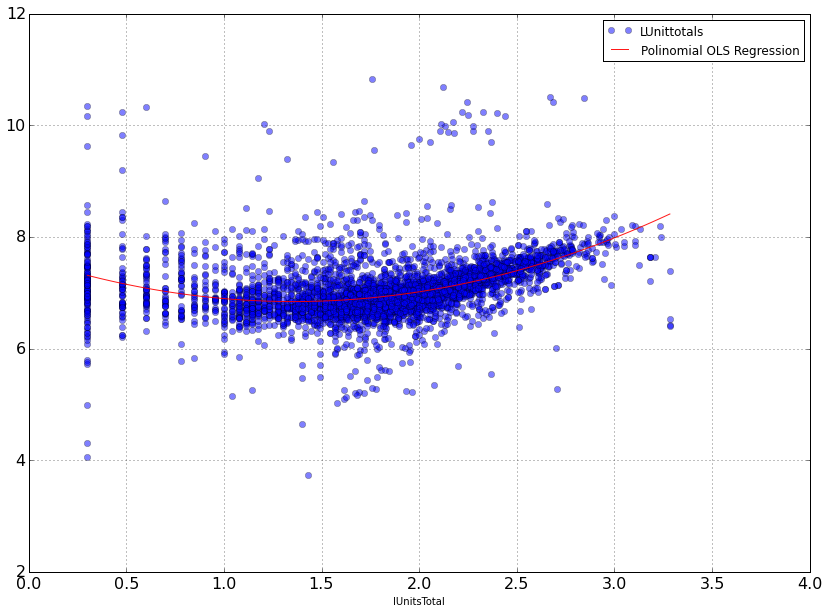

In [25]:
#Simlating 100 estimated Total energy observations with the coeficcients of the regression
lUnitsTotals_prime2 = np.linspace(bblnrgdata_cut2.lUnitsTotal.min(), bblnrgdata_cut2.lUnitsTotal.max(), 100)
ltenergy_hat2 = c[0] + c[1]*(lUnitsTotals_prime2) + c[2]*(lUnitsTotals_prime2**2)
#plot Total energy vs Total units with a log scale, and a simulated linear regression line
bblnrgdata_cut2.plot(x = 'lUnitsTotal', y = 'ltenergy', style='o', grid=True, figsize=(14,10), \
                fontsize = 16,  xlim=(0, 4), ylim=(2,12), alpha = 0.5, label='LUnittotals')
plt.plot(lUnitsTotals_prime2, ltenergy_hat2, 'r', alpha=0.9, label="Polinomial OLS Regression")
pl.legend()

After performing a second degree polinomial regression on total energy consumption baased on the number of units, we see a better fit of the curve in the regression model (graphically), this being confirmed also in an improvement of the r squared statistic (capacity of one variable to explain the changes on the other variables) compared to the lineal OLS regression in model 1.

In [26]:
#Perform likelihoof test on the polinomial model against the linear regression model.
mod3.compare_lr_test(mod)

(704.53169450142741, 3.0921596739201382e-155, 1.0)

Given the high value of the chi squared statistic (704,53) with a distribution with 1 degree level of freedom, and the low value of p (close to 0), we confirm that the polinomial model is a better fit than the linear model in this case.